In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read data
file = 'drive/My Drive/Coding/Transactions.csv'
df = pd.read_csv(file)

print(df.head())

   Unnamed: 0.1  Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
0             0           0               0  2023-01-01 00:00:31          596   
1             1           1               1  2023-01-01 00:02:10         4961   
2             2           2               2  2023-01-01 00:07:56            2   
3             3           3               3  2023-01-01 00:09:29         4128   
4             4           4               4  2023-01-01 00:10:34          927   

   TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  \
0         3156     533.07               31             0   
1         3412     808.56              130             0   
2         1365    1442.94              476             0   
3         8737     620.65              569             0   
4         9906     490.66              634             0   

                 TX_FRAUD_SCENARIO  
0           Legitimate Transaction  
1           Legitimate Transaction  
2  Fraudulent Transaction Internet  
3   

In [7]:
# Data exploration
df.describe()


,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01
std,5.063811e+05,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00
25%,4.385385e+05,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01
50%,8.770770e+05,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01
75%,1.315616e+06,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02
max,1.754154e+06,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02


In [8]:
## Checking for nan values
NaN_in_df = df.isnull().sum().any()
print(NaN_in_df)

False


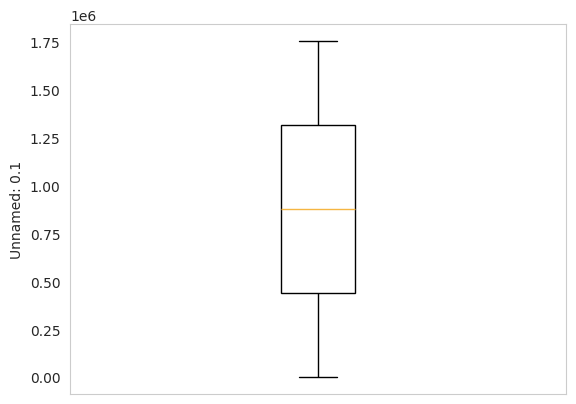

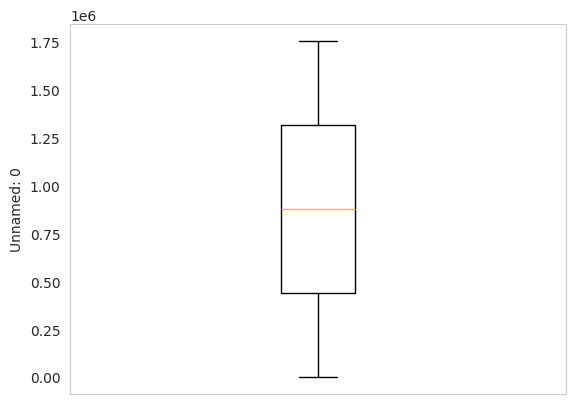

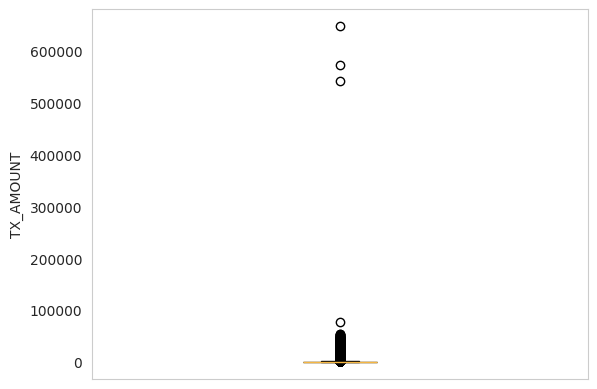

In [9]:
## Making some boxplots for all the columns in the dataframe
sns.set_style("whitegrid", {'axes.grid' : False})
###  First making boxplots of numerical values:
sns.boxplot(df['Unnamed: 0.1'], width=0.15, linecolor="black", color="white", medianprops={"color": "#f5b642"})
plt.show()
sns.boxplot(df['Unnamed: 0'], width=0.15, linecolor="black", color="white", medianprops={"color": "#f5b642"})
plt.show()
sns.boxplot(df['TX_AMOUNT'], width=0.15, linecolor="black", color="white", medianprops={"color": "#f5b642"})
plt.show()

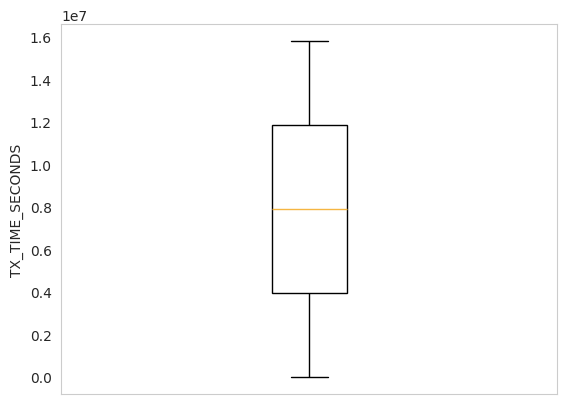

In [10]:
sns.boxplot(df['TX_TIME_SECONDS'], width=0.15, linecolor="black", color="white", medianprops={"color": "#f5b642"})
plt.show()

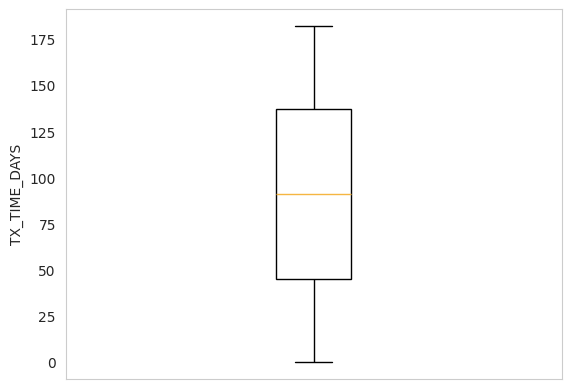

In [11]:
sns.boxplot(df['TX_TIME_DAYS'], width=0.15, linecolor="black", color="white", medianprops={"color": "#f5b642"})
plt.show()

In [12]:
#Checking if unnamed 0, unnamed 0.1, and TRANSACTION_ID are all just an index for the data
print(df['Unnamed: 0'].equals(df['Unnamed: 0.1']))
print(df['Unnamed: 0'].equals(df['TRANSACTION_ID']))

True
True


In [13]:
#Removing all three columns that are just indexes
clean_df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'TRANSACTION_ID'], axis=1)
print(clean_df.head())

           TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  \
0  2023-01-01 00:00:31          596         3156     533.07               31   
1  2023-01-01 00:02:10         4961         3412     808.56              130   
2  2023-01-01 00:07:56            2         1365    1442.94              476   
3  2023-01-01 00:09:29         4128         8737     620.65              569   
4  2023-01-01 00:10:34          927         9906     490.66              634   

   TX_TIME_DAYS                TX_FRAUD_SCENARIO  
0             0           Legitimate Transaction  
1             0           Legitimate Transaction  
2             0  Fraudulent Transaction Internet  
3             0           Legitimate Transaction  
4             0           Legitimate Transaction  


In [14]:
# Checking the values present in the TX_FRAUD_SCENARIO column
scenarios = clean_df.TX_FRAUD_SCENARIO.unique()
print(scenarios)

['Legitimate Transaction' 'Fraudulent Transaction Internet'
 'Fraudulent Transaction retailer' 'Fraudulent Transaction DAB']


In [15]:
import plotly.express as px

def plot_fraud_scenario_counts(data_frame):
    """
    Plots the counts of transactions for different fraud scenarios.

    :param data_frame: The DataFrame containing the data.
    """
    legit_count = data_frame['TX_FRAUD_SCENARIO'].value_counts()['Legitimate Transaction']
    internet_fraud = data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction Internet']
    retailer_fraud = data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction retailer']
    DAB_fraud = data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction DAB']
    values = [DAB_fraud, internet_fraud, retailer_fraud, legit_count]
    scenarios = 'Fraudulent Transaction DAB', 'Fraudulent Transaction Internet', 'Fraudulent Transaction Retailer', 'Legitimate Transaction'
    fig = px.bar(x=scenarios, y=values, labels={'x': 'Fraud scenarios', 'y': 'Number of Transactions'}, color=scenarios)
    fig.show()

# Call the function to plot fraud scenario counts
plot_fraud_scenario_counts(clean_df)

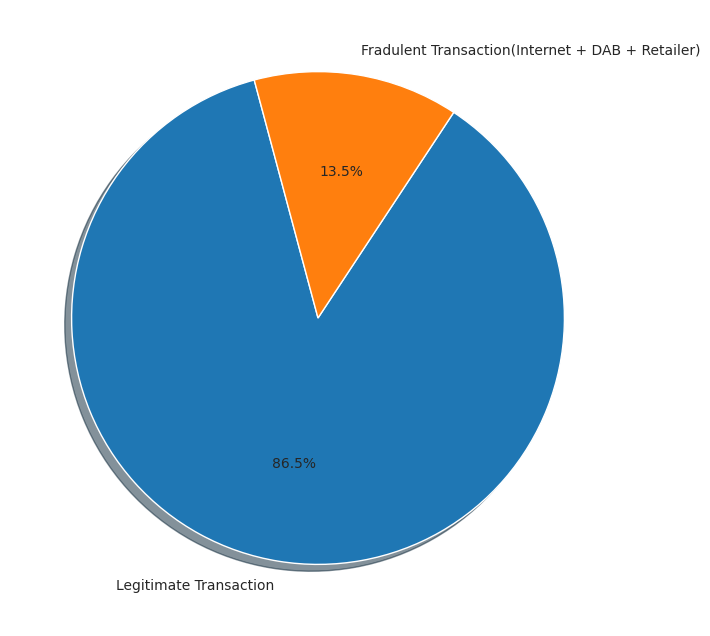

In [16]:
def plot_data_imbalance(data_frame, target_column):
    """
    Display a pie chart to illustrate class imbalance in the target column.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    all_frauds = (data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction Internet']) + data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction retailer'] + data_frame['TX_FRAUD_SCENARIO'].value_counts()['Fraudulent Transaction DAB']
    legit = data_frame['TX_FRAUD_SCENARIO'].value_counts()['Legitimate Transaction']
    categories = 'Legitimate Transaction', 'Fradulent Transaction(Internet + DAB + Retailer)'
    values = [legit, all_frauds]
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=105, shadow=True)
    plt.show()


# Call the function to display class imbalance in the 'TX_FRAUD_SCENARIO' column
plot_data_imbalance(clean_df, 'TX_FRAUD_SCENARIO')


In [17]:
# Think about merging your frauds together
clean_df_2 = clean_df.copy()
clean_df_2['TX_FRAUD_SCENARIO'] = clean_df_2['TX_FRAUD_SCENARIO'].replace('Fraudulent Transaction Internet', 'Fraudulent Transaction')
clean_df_2['TX_FRAUD_SCENARIO'] = clean_df_2['TX_FRAUD_SCENARIO'].replace('Fraudulent Transaction retailer', 'Fraudulent Transaction')
clean_df_2['TX_FRAUD_SCENARIO'] = clean_df_2['TX_FRAUD_SCENARIO'].replace('Fraudulent Transaction DAB', 'Fraudulent Transaction')
print(clean_df_2.head())
print(clean_df_2.TX_FRAUD_SCENARIO.unique())

           TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  \
0  2023-01-01 00:00:31          596         3156     533.07               31   
1  2023-01-01 00:02:10         4961         3412     808.56              130   
2  2023-01-01 00:07:56            2         1365    1442.94              476   
3  2023-01-01 00:09:29         4128         8737     620.65              569   
4  2023-01-01 00:10:34          927         9906     490.66              634   

   TX_TIME_DAYS       TX_FRAUD_SCENARIO  
0             0  Legitimate Transaction  
1             0  Legitimate Transaction  
2             0  Fraudulent Transaction  
3             0  Legitimate Transaction  
4             0  Legitimate Transaction  
['Legitimate Transaction' 'Fraudulent Transaction']


In [18]:
#Checking what format the dates are in
print(clean_df_2.TX_DATETIME.unique())

['2023-01-01 00:00:31' '2023-01-01 00:02:10' '2023-01-01 00:07:56' ...
 '2023-07-02 23:58:21' '2023-07-02 23:59:52' '2023-07-02 23:59:57']


In [19]:

import datetime as dt
def visualize_monthly_transactions(df):
    """
    Visualizes the distribution of transactions per month and their fraud scenario using a grouped bar plot.

    :param df: DataFrame containing transaction data.
    """
    monthly_fraud = df.copy()
    monthly_fraud['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'], format='%Y-%m-%d %H:%M:%S')
    monthly_fraud['Month'] = monthly_fraud['TX_DATETIME'].dt.month
    monthly_frauds = monthly_fraud.groupby(['Month', 'TX_FRAUD_SCENARIO']).size().reset_index(name='Count')
    fig = px.bar(monthly_frauds, x='Month', y='Count', color='TX_FRAUD_SCENARIO',
                 labels={'Month': 'Month', 'Count': 'Number of Transactions', 'TX_FRAUD_SCENARIO': 'Fraud Scenario'},
                 title='Monthly Distribution of Transactions and Fraud Scenario', barmode='stack', category_orders={"TX_FRAUD_SCENARIO": ["Fradulent Transaction", "Legitimate Transaction"]})
    fig.show()


# Call the function to visualize monthly transactions and fraud scenarios
visualize_monthly_transactions(clean_df_2)




In [20]:
# Change the dates' format, and the format of the TX_FRAUD_SCENARIO to be numerical, not string
df_clean_3 = clean_df_2.copy()
df_clean_3['TX_DATETIME'] = pd.to_datetime(df_clean_3['TX_DATETIME'], format='%Y-%m-%d %H:%M:%S')
df_clean_3['Month'] = df_clean_3['TX_DATETIME'].dt.month
df_clean_3['Day'] = df_clean_3['TX_DATETIME'].dt.day
df_clean_3['Hour'] = df_clean_3['TX_DATETIME'].dt.hour
df_clean_3 = df_clean_3.drop('TX_DATETIME', axis=1)
df_clean_3['TX_FRAUD_SCENARIO'] = df_clean_3['TX_FRAUD_SCENARIO'].replace('Fraudulent Transaction', 1)
df_clean_3['TX_FRAUD_SCENARIO'] = df_clean_3['TX_FRAUD_SCENARIO'].replace('Legitimate Transaction', 0)
print(df_clean_3.head())
print(df_clean_3['Day'].unique())

   CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  \
0          596         3156     533.07               31             0   
1         4961         3412     808.56              130             0   
2            2         1365    1442.94              476             0   
3         4128         8737     620.65              569             0   
4          927         9906     490.66              634             0   

   TX_FRAUD_SCENARIO  Month  Day  Hour  
0                  0      1    1     0  
1                  0      1    1     0  
2                  1      1    1     0  
3                  0      1    1     0  
4                  0      1    1     0  
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [21]:
#Splitting the data into test and training set
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(df_clean_3, test_size=0.2, random_state=100)

In [22]:
from imblearn.over_sampling import SMOTE

def balance_data_with_smote(df, target_column):
    """
    Balances the dataset using SMOTE to oversample the minority class.

    :param df: The DataFrame containing the data.
    :param target_column: The name of the target column for which the balancing is performed.
    :return: A balanced DataFrame.
    """
    balanced_data = df.copy()
    balanced_x = balanced_data.drop(target_column, axis=1)
    balanced_y = balanced_data[target_column]
    smote = SMOTE(random_state=100, sampling_strategy='minority')
    balanced_x, balanced_y = smote.fit_resample(balanced_x, balanced_y)
    balanced_data = pd.concat([balanced_x, balanced_y], axis=1)
    return balanced_data

# Balance the dataset using SMOTE based on the 'TX_FRAUD_SCENARIO' column
balanced_df = balance_data_with_smote(training_set, 'TX_FRAUD_SCENARIO')
print(balanced_df.head())

   CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  Month  \
0         2081         4907     772.45         11205175           129      5   
1         1532         4125     677.48         11213695           129      5   
2         2023         9459     441.47         10476112           121      5   
3         4408         6840      79.66           644114             7      1   
4         1405         5492      57.83         15239130           176      6   

   Day  Hour  TX_FRAUD_SCENARIO  
0   10    16                  0  
1   10    18                  0  
2    2     6                  0  
3    8    10                  0  
4   26     9                  0  


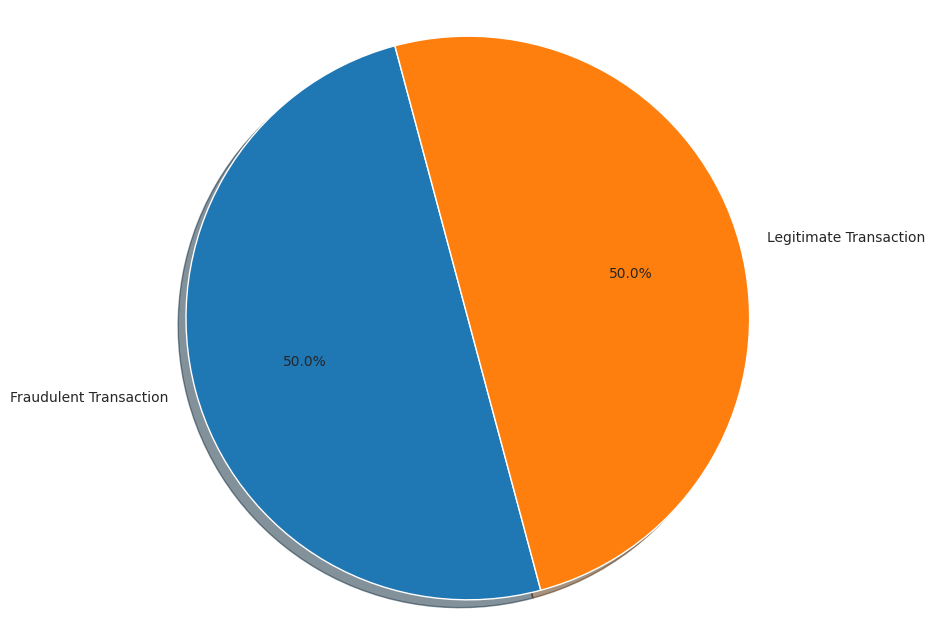

In [23]:
def plot_data_imbalance(data_frame, target_column):
    """
    Display a pie chart to illustrate the class imbalance in the target column.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    #categories = 'Legitimate Transaction', 'Fradulent Transaction(Internet + DAB + Retailer)'
    #values = [legit, all_frauds]
    plt.figure(figsize=(8, 8))
    value_counts = data_frame[target_column].value_counts()
    labels = {'Fraudulent Transaction': 1, 'Legitimate Transaction': 0}
    sizes = value_counts.values

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=105, shadow=True)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Call the function to display the class imbalance in the 'TX_FRAUD_SCENARIO' column
plot_data_imbalance(balanced_df, 'TX_FRAUD_SCENARIO')

In [24]:
# It's up to you to continue
# Remember to look in the module subject for more information on what to do next and on the benefits of this module, the following exercises are no longer guided.
# The overall goal is to reach 0.99 accuracy (on the test set)

In [25]:
# First trying out Logistic Regression, should reach 0.802 accuracy


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = balanced_df.drop('TX_FRAUD_SCENARIO', axis=1)
y_train = balanced_df['TX_FRAUD_SCENARIO']
X_test = test_set.drop('TX_FRAUD_SCENARIO', axis=1)
y_test = test_set['TX_FRAUD_SCENARIO']


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model's accuracy on the test set: {accuracy}")

Logistic Regression model's accuracy on the test set: 0.8379419150531168


In [26]:
# 2nd: trying K-nearest Neighbours: should reach 0.973 accuracy

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"K-nearest Neighbours model's accuracy on the test set: {accuracy}")
print('Best so far: 0.9189285024239443 with n_neighbors = 5')

K-nearest Neighbours model's accuracy on the test set: 0.8496541069631817
Best so far: 0.9189285024239443 with n_neighbors = 5


In [27]:
#Scaling the data before trying the next method:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# 3rd: Trying Decision Tree - should reach  0.996

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=100)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree model's accuracy on the test set: {accuracy}")
print('Best so far: 0.966160287711656 with random_state = 100')

Decision Tree model's accuracy on the test set: 0.964167932708341
Best so far: 0.966160287711656 with random_state = 100


In [38]:
# 4th Trying XGBoost
!pip install xgboost==2.1.1

import xgboost as xgb
from xgboost import XGBClassifier

#dmatrix_train = xgb.DMatrix(X_train, label=y_train)
#dmatrix_test = xgb.DMatrix(X_test, label=y_test)

#params = {
#    'objective': 'binary:logistic',
#    'eval_metric': 'logloss',
#    'eta': 0.2,
#    'max_depth': 20,
#    'lambda': 1,
#    'min_child_weight': 1
#}

#iterations = 100
#xgboost_model = xgb.train(params, dmatrix_train, iterations)

xgboost_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    eta=0.2,
    max_depth=20,
    iterations=100,
    min_child_weight=1
)

xgboost_model.fit(X_train, y_train)  # Fit the model

y_pred = xgboost_model.predict(X_test)
#y_pred_binary = [round(value) for value in y_pred]

#accuracy = accuracy_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost model's accuracy on the test set: {accuracy}")
print('Best so far:  0.9823297969507483 Parameters: objective: binary:logistic, eval_metric: logloss, eta: 0.2, max_depth: 20, iterations: 100, lambda: 1, min_child_weight: 1')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:47:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.




XGBoost model's accuracy on the test set: 0.9933272715352977
Best so far:  0.9823297969507483 Parameters: objective: binary:logistic, eval_metric: logloss, eta: 0.2, max_depth: 20, iterations: 100, lambda: 1, min_child_weight: 1


Confusion Matrix:
[[302872    662]
 [  1679  45618]]


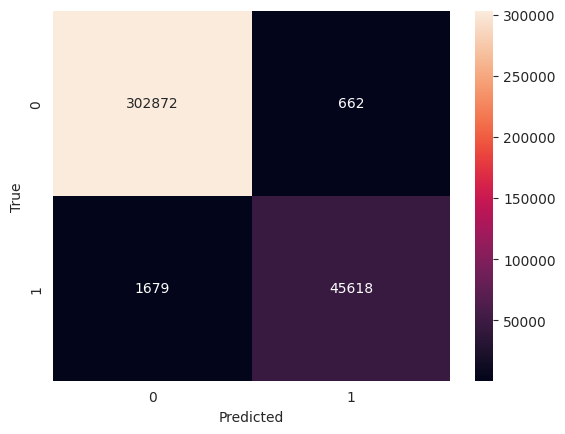

In [39]:
#Continuing with the data from the XGBoost training.
#Calculating confusion matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
# Classification report:

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    303534
           1       0.99      0.96      0.97     47297

    accuracy                           0.99    350831
   macro avg       0.99      0.98      0.99    350831
weighted avg       0.99      0.99      0.99    350831



In [41]:
# Plotting a learning curve:

from sklearn.model_selection import learning_curve
import numpy as np

X_all = df_clean_3.drop('TX_FRAUD_SCENARIO', axis=1)
y_all = df_clean_3['TX_FRAUD_SCENARIO']

train_sizes, train_scores, test_scores = learning_curve(xgboost_model, X_all, y_all, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:49:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:50:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:50:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:50:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:50:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: {